<a href="https://colab.research.google.com/github/XM2202-02/hello-github-actions/blob/main/T13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

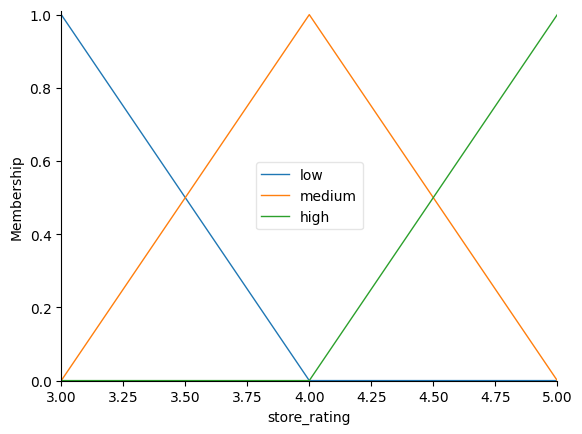

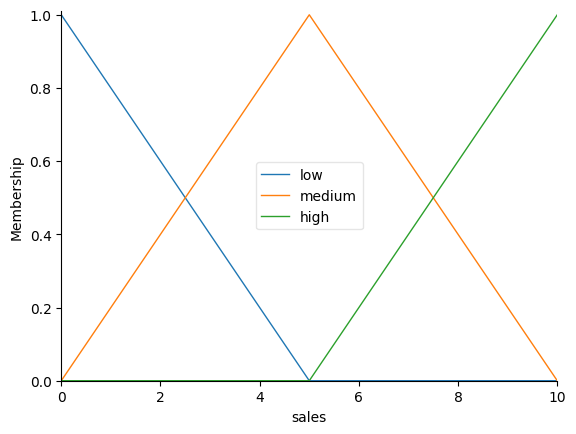

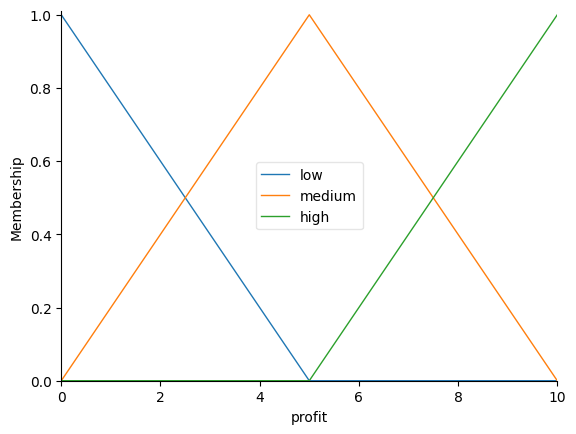

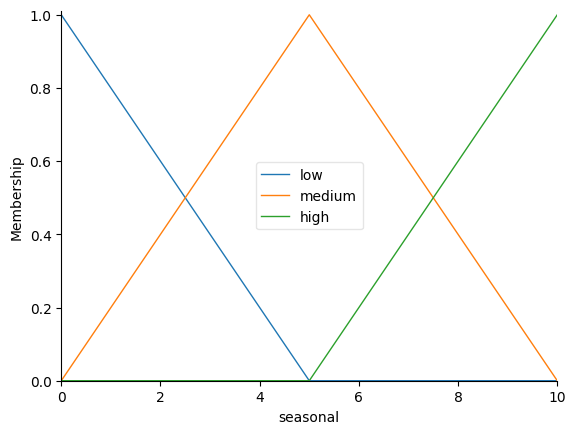

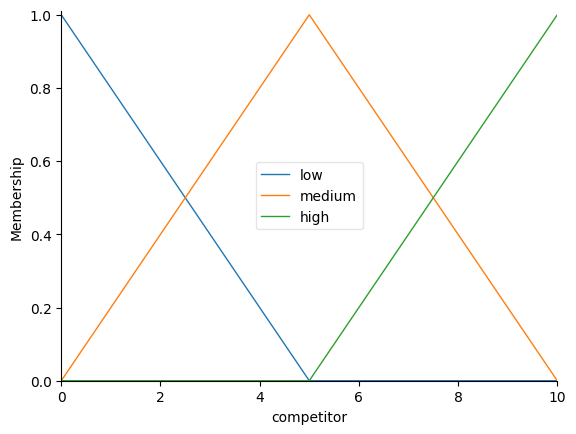

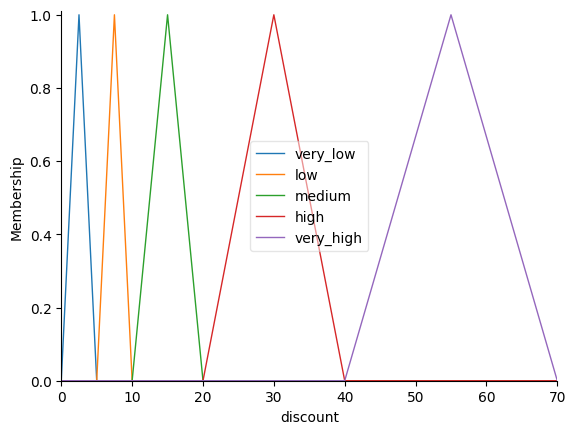

In [31]:
#T13 Disc Shopee
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
store_rating=ctrl.Antecedent(np.arange(3,5.1,0.1),'store_rating')
sales=ctrl.Antecedent(np.arange(0,10.1,0.1),'sales')
profit=ctrl.Antecedent(np.arange(0,10.1,0.1),'profit')
seasonal=ctrl.Antecedent(np.arange(0,10.1,0.1),'seasonal')
competitor=ctrl.Antecedent(np.arange(0,10.1,0.1),'competitor')
discount=ctrl.Consequent(np.arange(0,70.1,0.1),'discount')
store_rating['low']=fuzz.trimf(store_rating.universe,[3,3,4])
store_rating['medium']=fuzz.trimf(store_rating.universe,[3,4,5])
store_rating['high']=fuzz.trimf(store_rating.universe,[4,5,5.1])
sales['low']=fuzz.trimf(sales.universe,[0,0,5])
sales['medium']=fuzz.trimf(sales.universe,[0,5,10])
sales['high']=fuzz.trimf(sales.universe,[5,10,10])
profit['low']=fuzz.trimf(profit.universe,[0,0,5])
profit['medium']=fuzz.trimf(profit.universe,[0,5,10])
profit['high']=fuzz.trimf(profit.universe,[5,10,10])
seasonal['low']=fuzz.trimf(seasonal.universe,[0,0,5])
seasonal['medium']=fuzz.trimf(seasonal.universe,[0,5,10])
seasonal['high']=fuzz.trimf(seasonal.universe,[5,10,10])
competitor['low']=fuzz.trimf(competitor.universe,[0,0,5])
competitor['medium']=fuzz.trimf(competitor.universe,[0,5,10])
competitor['high']=fuzz.trimf(competitor.universe,[5,10,10])
discount['very_low']=fuzz.trimf(discount.universe,[0,2.5,5])
discount['low']=fuzz.trimf(discount.universe,[5,7.5,10])
discount['medium']=fuzz.trimf(discount.universe,[10,15,20])
discount['high']=fuzz.trimf(discount.universe,[20,30,40])
discount['very_high']=fuzz.trimf(discount.universe,[40,55,70])
store_rating.view()
sales.view()
profit.view()
seasonal.view()
competitor.view()
discount.view()

Discount: 37.469135802469076


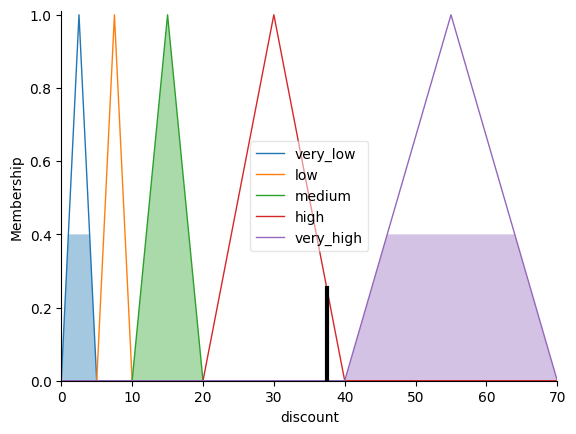

In [34]:
rule1=ctrl.Rule(store_rating['high']|sales['high']|profit['high'],discount['very_low'])
rule2=ctrl.Rule(store_rating['low']|sales['low']|profit['high'],discount['high'])
rule3=ctrl.Rule(seasonal['high']|competitor['high'],discount['medium'])
rule4=ctrl.Rule(store_rating['medium']|sales['medium']|profit['medium'],discount['medium'])
rule5=ctrl.Rule(store_rating['low']|sales['high']|profit['low'],discount['very_low'])
rule6=ctrl.Rule(store_rating['low']|seasonal['low'],discount['medium'])
rule7=ctrl.Rule(sales['low']|profit['low'],discount['very_high'])
control_system=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7])
control_sim=ctrl.ControlSystemSimulation(control_system)
control_sim.input['store_rating']=4.3
control_sim.input['sales']=5
control_sim.input['profit']=3
control_sim.input['seasonal']=10
control_sim.input['competitor']=10
control_sim.compute()
print(f"Discount: {control_sim.output['discount']}")
discount.view(sim=control_sim)